In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# first neural network with keras tutorial
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 40}

matplotlib.rc('font', **font)


In [ ]:
#California snapshots
CA_ASO_files_201906 = [ 'KC20190608_Data_set_SWE.csv', 'SF20190609_Data_set_SWE.csv', 'TE20190613_Data_set_SWE.csv',
                        'MB20190604_Data_set_SWE.csv', 'KN20190611_Data_set_SWE.csv', 'LB20190611_Data_set_SWE.csv',
                        'SJ20190614_Data_set_SWE.csv']
#Colorado snapshots
COl_ASO_files_201906 = [ 'GE20190610_Data_set_SWE.csv', 'BR20190624_Data_set_SWE.csv', 'CM20190610_Data_set_SWE.csv',
                        'GT20190609_Data_set_SWE.csv']

# Data Files

In [ ]:
# creating the Dataframe and variable into X California
CA_dataframe_201906 = pd.read_csv(CA_ASO_files_201906[0], index_col = 0)

for file in CA_ASO_files_201906[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    CA_dataframe_201906 = pd.concat([CA_dataframe_201906, dataframe], ignore_index=True)
    print(CA_dataframe_201906.shape)


CA_dataset = CA_dataframe_201906.values
CA_X = CA_dataset[:, 2:10]


# creating the Dataframe and variable into X Colorado
COL_dataframe_201906 = pd.read_csv(COl_ASO_files_201906[0], index_col = 0)

for file in COl_ASO_files_201906[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    COL_dataframe_201906 = pd.concat([COL_dataframe_201906, dataframe], ignore_index=True)

COL_dataset = COL_dataframe_201906.values
COL_X = COL_dataset[:, 2:10]


(3879, 10)
(6027, 10)
(7100, 10)
(7863, 10)
(7875, 10)
(9605, 10)


# California

# Variance and Communality

In [ ]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis
fa_CA = FactorAnalyzer(n_factors = 2, rotation = 'varimax',method='ml')
fa_CA.fit(CA_X)
X_fa_CA = fa_CA.transform(CA_X)
print('Portion of variance explained by Factors: '+ str(np.mean(np.square(fa_CA.loadings_),axis = 0)))
print('Communality: '+str(np.sum(np.square(fa_CA.loadings_),axis = 1)))
var_f1 = np.mean(np.square(fa_CA.loadings_),axis = 0)[0]
var_f2 = np.mean(np.square(fa_CA.loadings_),axis = 0)[1]
print('Loadings: ')
fa_CA.loadings_

Portion of variance explained by Factors: [0.49069818 0.19469744]
Communality: [1.00185661e-01 2.47364385e-04 9.47060256e-01 9.56090846e-01
 9.20721499e-01 9.95004286e-01 9.89003291e-01 5.74851750e-01]
Loadings: 


array([[-0.10307335, -0.29926835],
       [ 0.00557792,  0.01470548],
       [ 0.9653563 ,  0.12307502],
       [-0.96478496, -0.15899948],
       [ 0.78479228,  0.55210739],
       [ 0.02983473,  0.99705274],
       [-0.98043497, -0.16658499],
       [ 0.68859687,  0.31731074]])

In [ ]:
from tabulate import tabulate
table = [['Variables', 'Loadings on Factor 1 ', 'Loadings on Factor 2', 'Communality: $l^2_{i1} + l^2_{i2}$'], ['Slope','-0.10307335', '-0.29926835' , '0.100' ], ['Aspect', '0.00557792',  '0.01470548', '0.00025'], ['DEM', '0.965' ,  '0.123' , '0.947' ], ['SUMPDD', '-0.965', '-0.159', '0.956' ], ['AccSnow', '0.785',  '0.552', '0.921' ], ['AccPrec',  '0.0230',  '0.997', '0.995' ], ['AvgTemp', '0.98043497', '-0.166585', '0.989' ], ['SWE', '0.689',  '0.317' , '0.575' ]]
print(tabulate(table, headers='firstrow'))

Variables      Loadings on Factor 1     Loadings on Factor 2    Communality: $l^2_{i1} + l^2_{i2}$
-----------  -----------------------  ----------------------  ------------------------------------
Slope                    -0.103073                -0.299268                                0.1
Aspect                    0.00557792               0.0147055                               0.00025
DEM                       0.965                    0.123                                   0.947
SUMPDD                   -0.965                   -0.159                                   0.956
AccSnow                   0.785                    0.552                                   0.921
AccPrec                   0.023                    0.997                                   0.995
AvgTemp                   0.980435                -0.166585                                0.989
SWE                       0.689                    0.317                                   0.575


# Factor loading

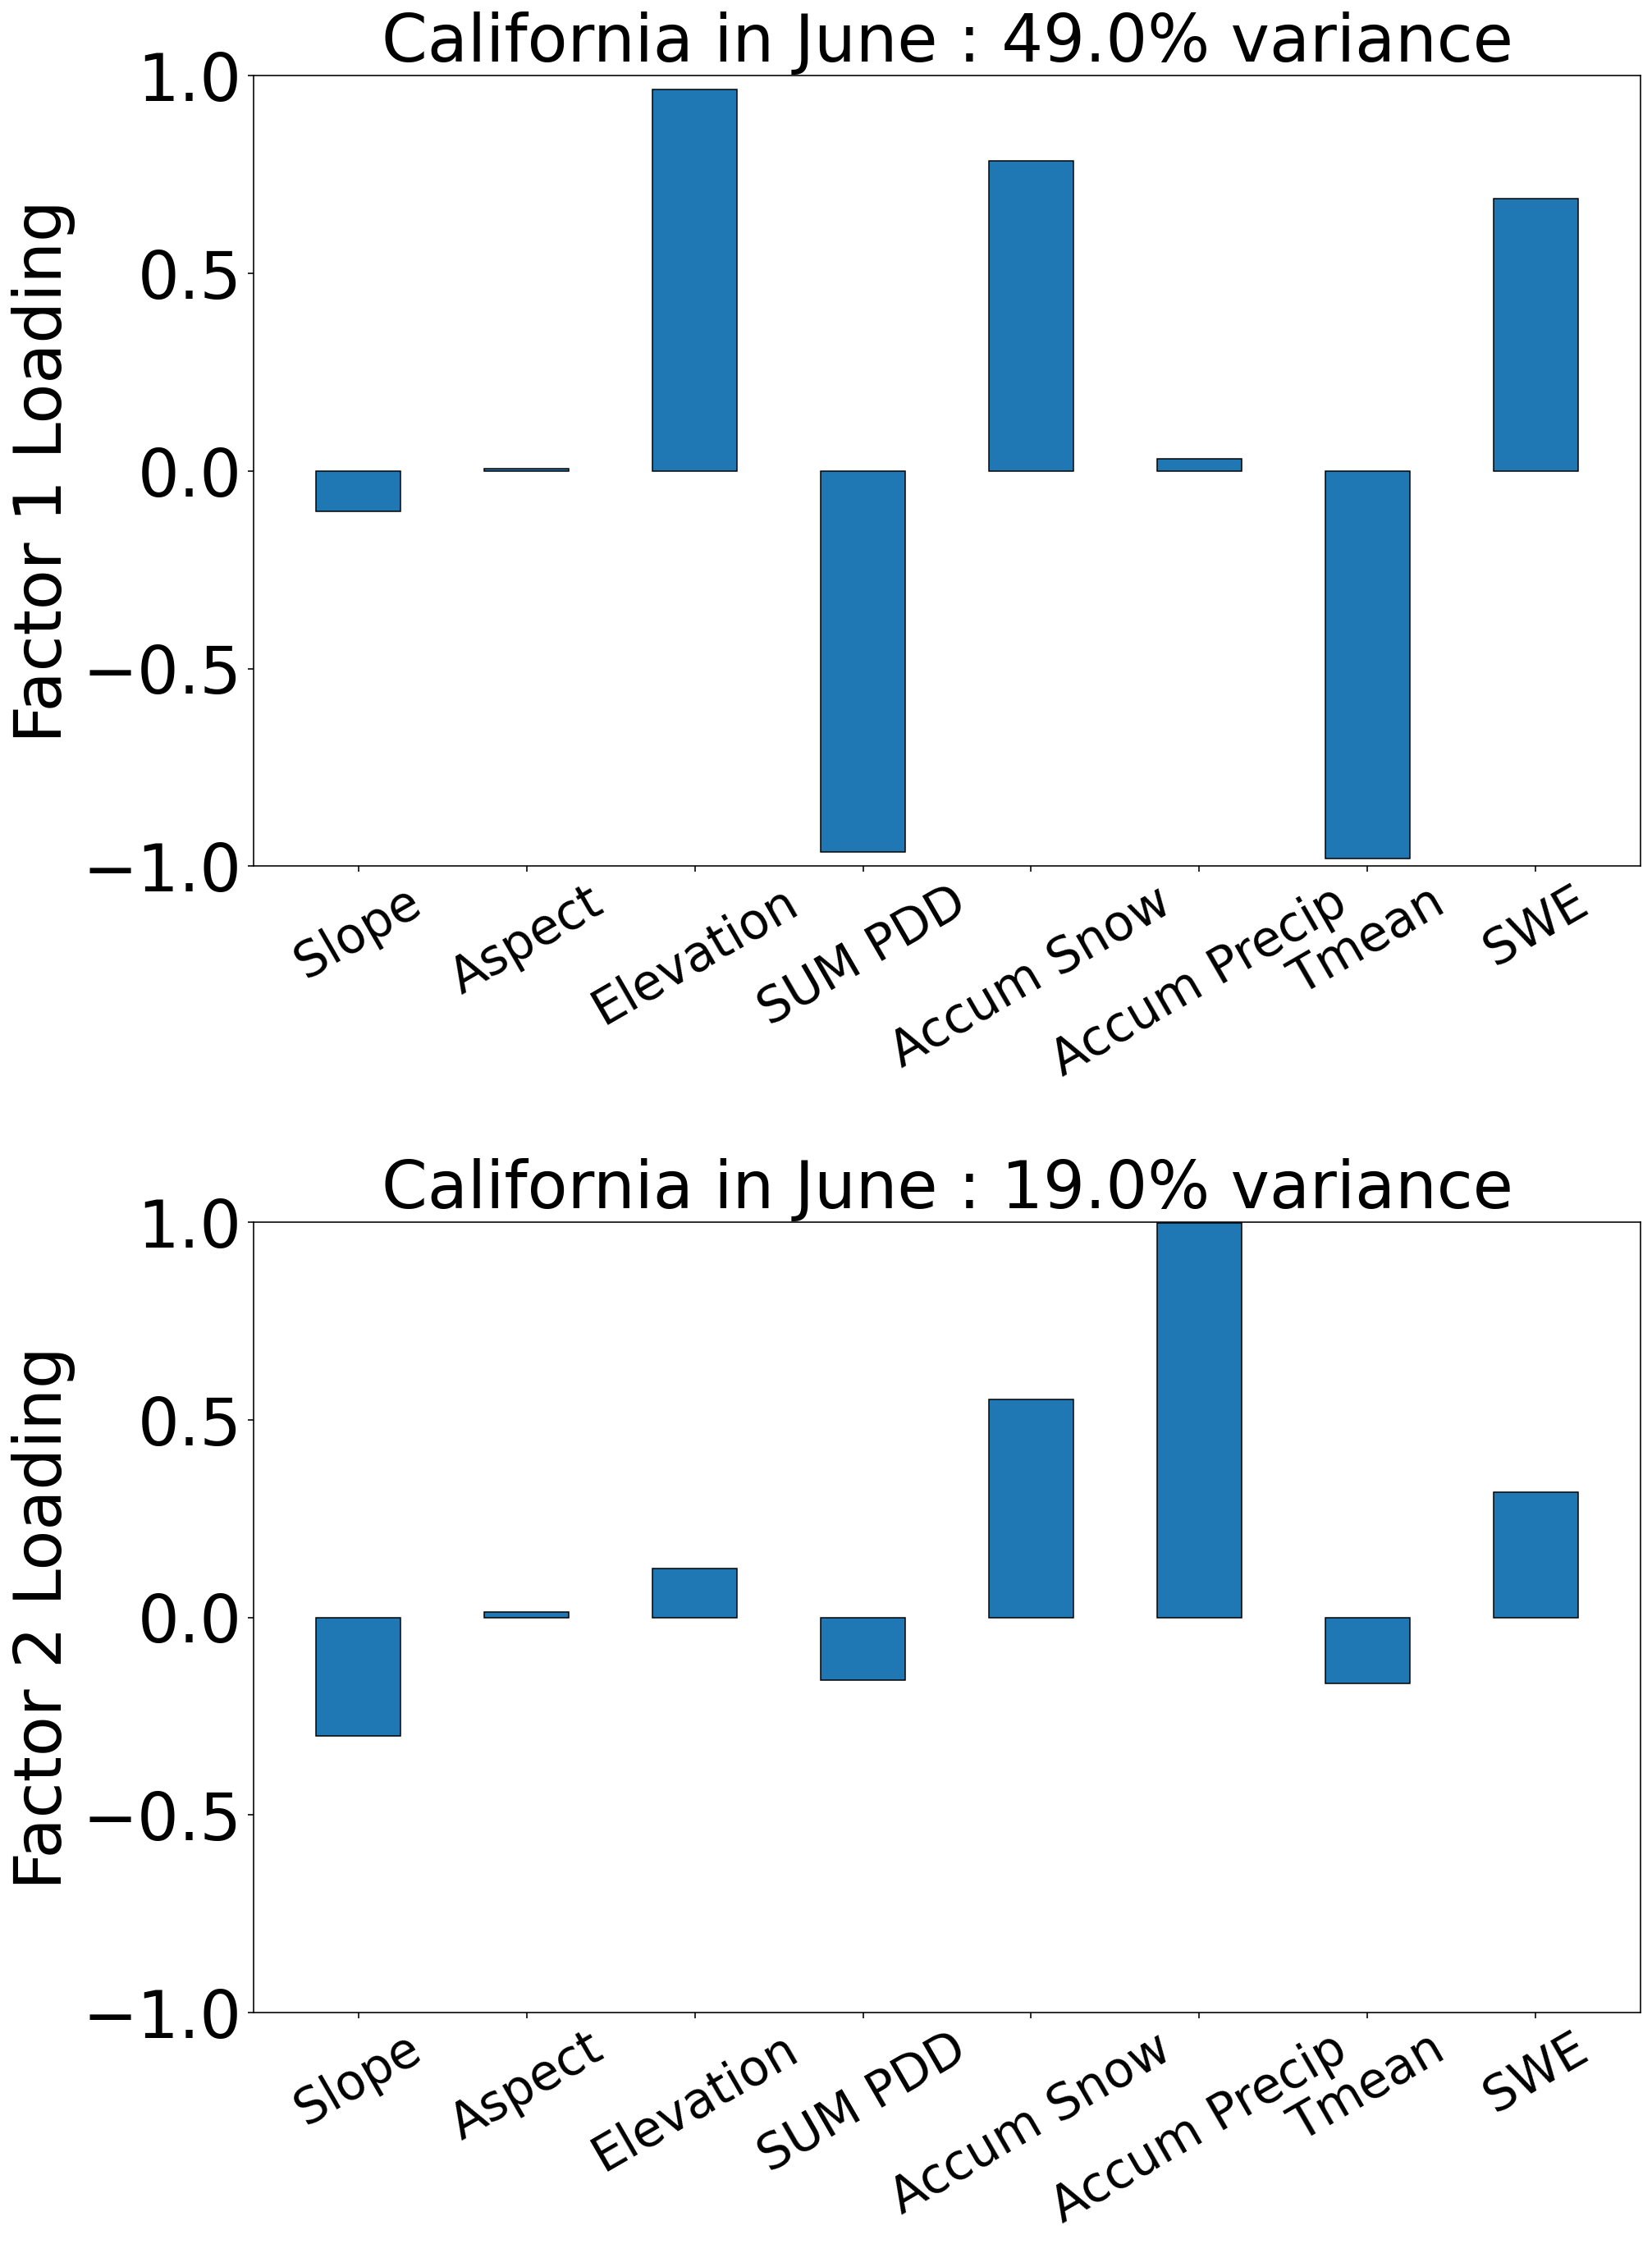

In [ ]:
fig = plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
bars = ['Slope', 'Aspect', 'Elevation',  'SUM PDD', 'Accum Snow', 'Accum Precip',  'Tmean', 'SWE']
plt.bar(range(len(bars)), fa_CA.loadings_.T[0], edgecolor='k', linewidth=0.75, width=0.5)
#plt.hlines(y=0, xmin=-2, xmax=2)
plt.ylim(-1, 1)
plt.xticks(range(len(bars)), bars, rotation=30, fontsize = 30)
plt.ylabel('Factor 1 Loading', fontsize = 40)
plt.title('California in June : ' + str(np.round((var_f1)*100))+'% variance', fontsize = 40)

plt.subplot(2,1,2)
plt.bar(range(len(bars)), fa_CA.loadings_.T[1], edgecolor='k', linewidth=0.75, width=0.5)
#plt.hlines(y=0, xmin=-2, xmax=2)
plt.ylim(-1, 1)
plt.xticks(range(len(bars)), bars, rotation=30, fontsize = 30)
plt.ylabel('Factor 2 Loading', fontsize = 40)
plt.title('California in June : ' + str(np.round((var_f2)*100))+'% variance', fontsize = 40)

fig.tight_layout()
fig.savefig('/scratch/users/lie08/FactorPlots_August_2023/CA_FA_laodingplot_summer_equal_y.pdf')




# Colorado

# Variance and Communality

In [ ]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis
fa_COL = FactorAnalyzer(n_factors = 3, rotation = 'varimax',method='ml')
fa_COL.fit(COL_X)
X_fa_COL = fa_COL.transform(COL_X)
print('Portion of variance explained by Factors: '+ str(np.mean(np.square(fa_COL.loadings_),axis = 0)))
print('Communality: '+str(np.sum(np.square(fa_COL.loadings_),axis = 1)))
var_f1 = np.mean(np.square(fa_COL.loadings_),axis = 0)[0]
var_f2 = np.mean(np.square(fa_COL.loadings_),axis = 0)[1]
var_f3 = np.mean(np.square(fa_COL.loadings_),axis = 0)[2]
fa_COL.loadings_

Portion of variance explained by Factors: [0.31130122 0.30703027 0.09912902]
Communality: [0.18431177 0.01978102 0.9950002  0.87640758 0.99503525 0.99009828
 0.94175041 0.73729958]


array([[ 0.42894765,  0.01169256,  0.01337791],
       [-0.03105259,  0.0414781 , -0.13075293],
       [ 0.68302773,  0.42074976, -0.59282625],
       [-0.31742544, -0.8335619 ,  0.28429425],
       [ 0.79270939,  0.59712159,  0.10046326],
       [ 0.8214764 ,  0.45261032,  0.33229308],
       [-0.15264657, -0.84351945,  0.4548894 ],
       [ 0.64160033,  0.55641156, -0.12670744]])

# Factor Loading

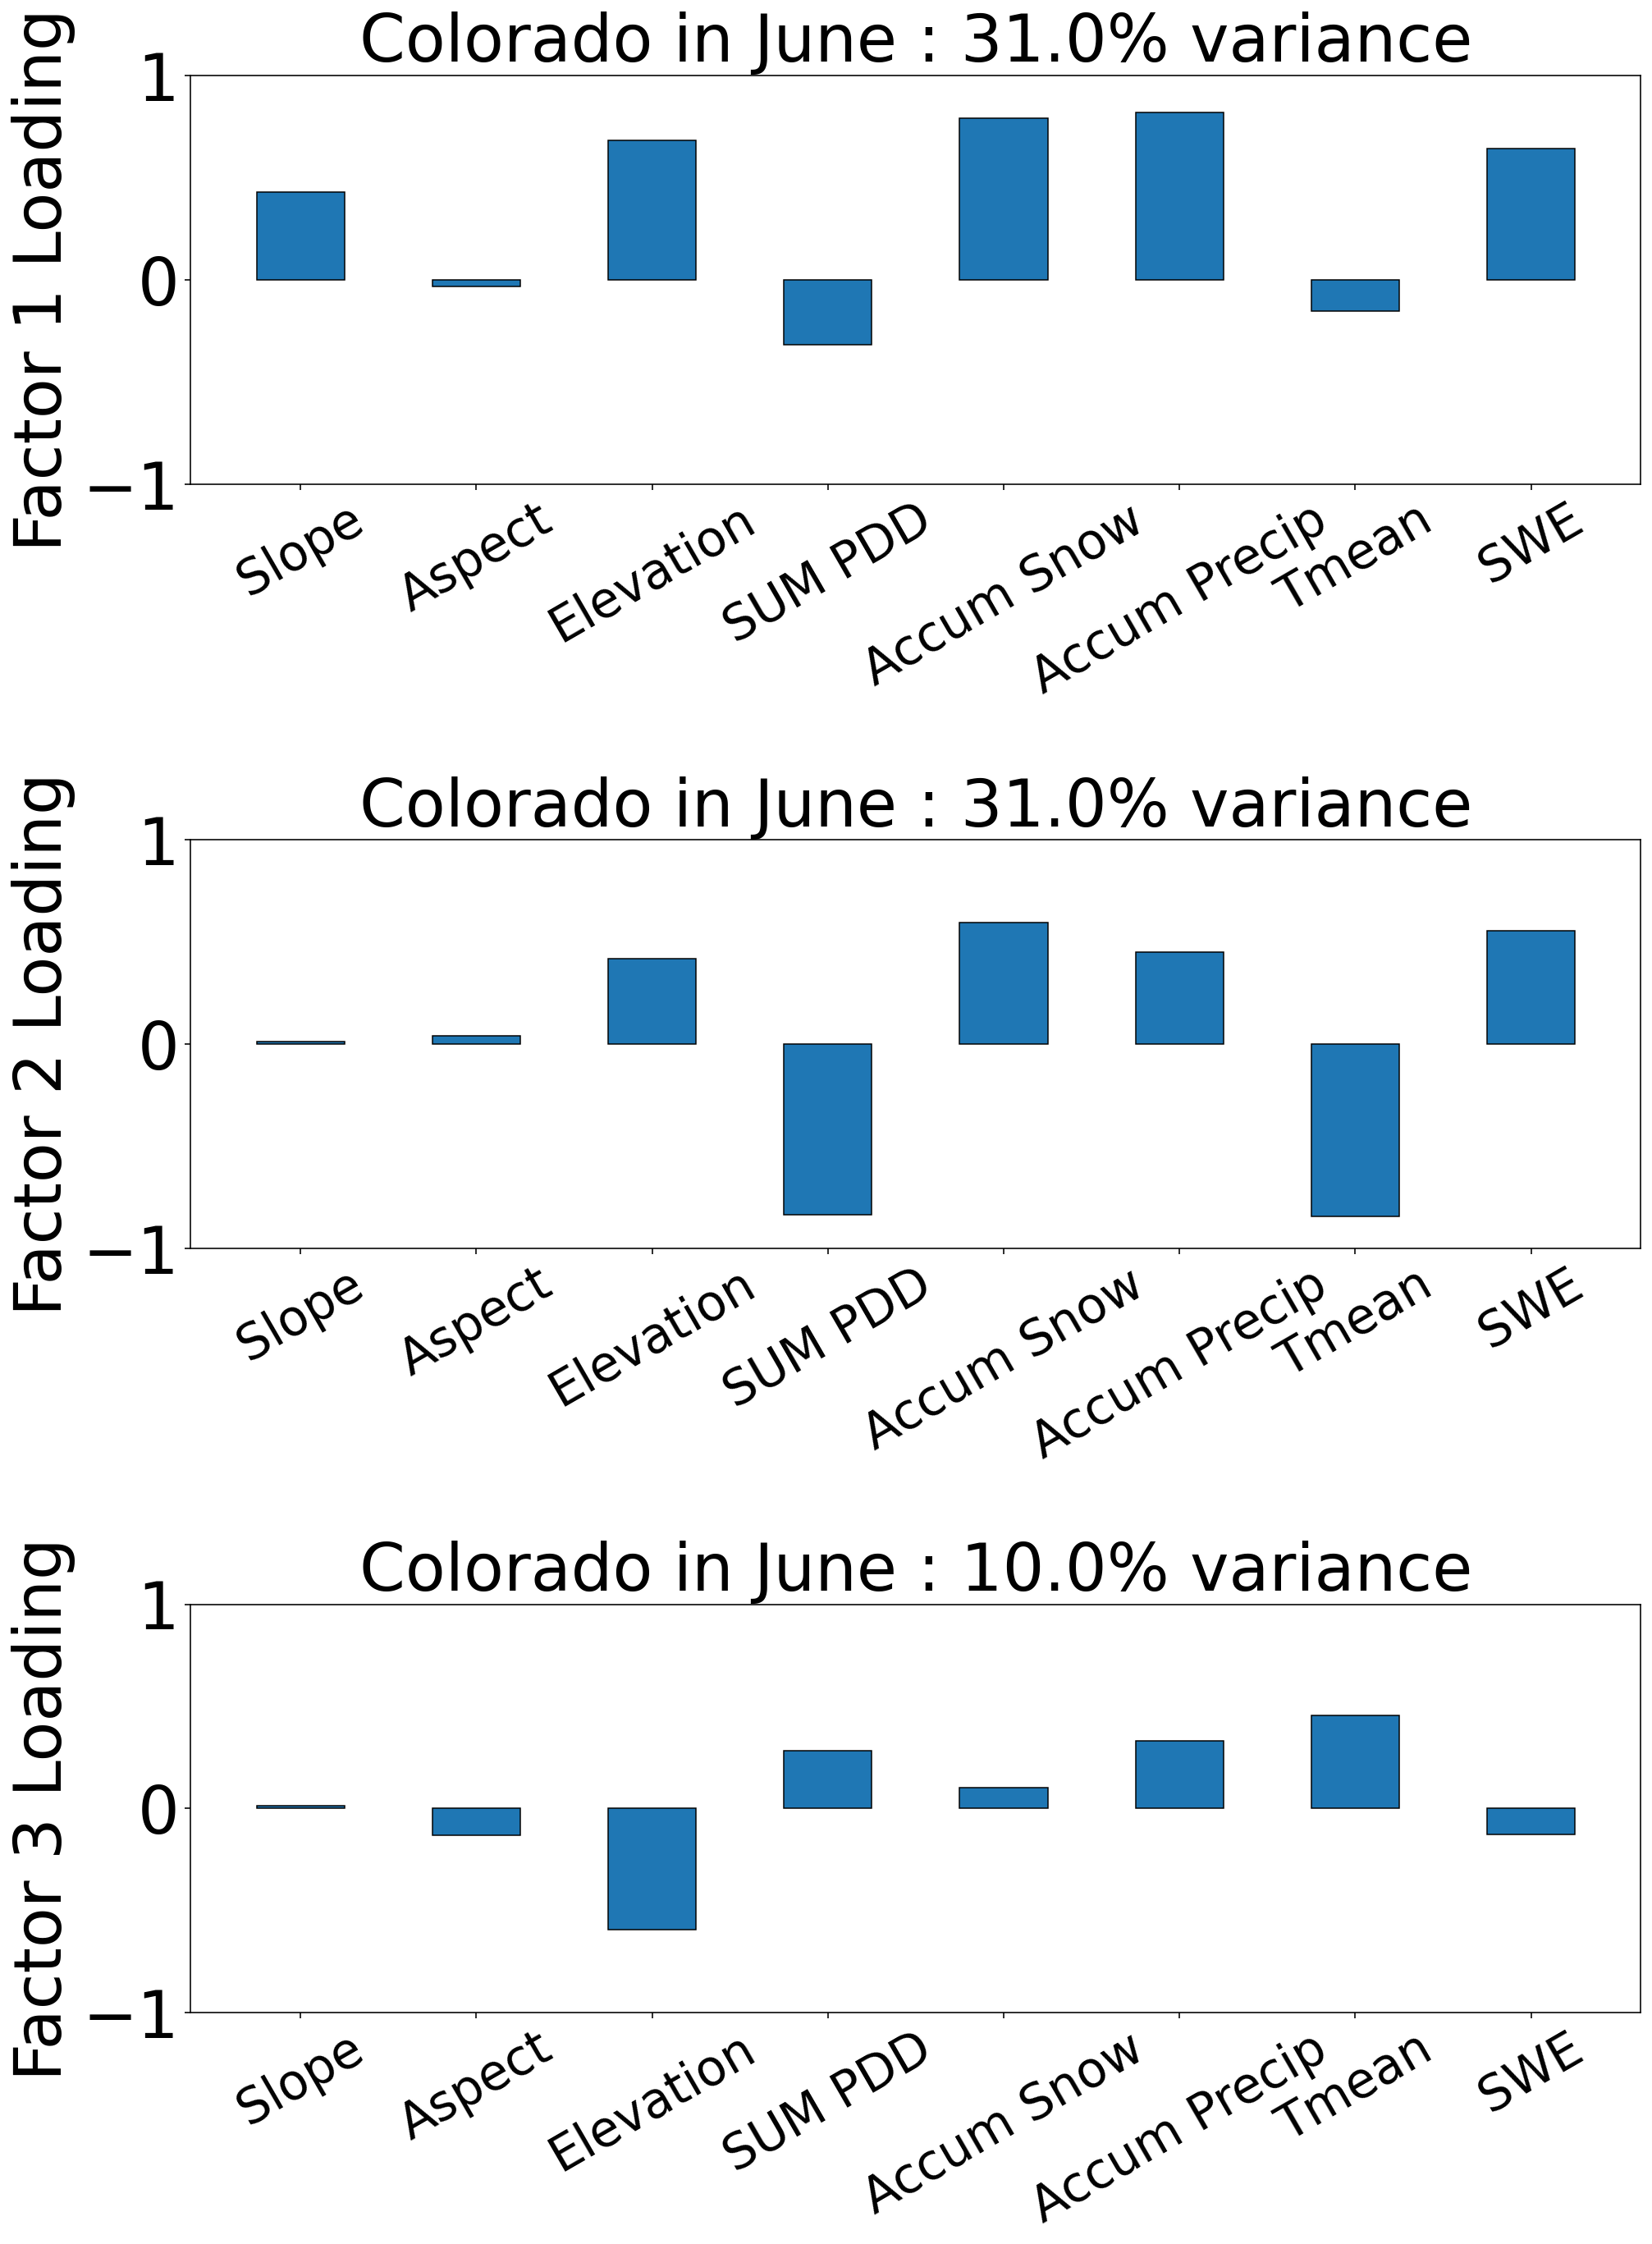

In [ ]:
fig = plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
bars = ['Slope', 'Aspect', 'Elevation',  'SUM PDD', 'Accum Snow', 'Accum Precip',  'Tmean', 'SWE']
plt.bar(range(len(bars)), fa_COL.loadings_.T[0], edgecolor='k', linewidth=0.75, width=0.5)
#plt.hlines(y=0, xmin=-2, xmax=2)
plt.ylim(-1, 1)
plt.xticks(range(len(bars)), bars, rotation=30, fontsize = 30)
plt.ylabel('Factor 1 Loading', fontsize = 40)
plt.title('Colorado in June : ' + str(np.round((var_f1)*100))+'% variance', fontsize = 40)

plt.subplot(3,1,2)
plt.bar(range(len(bars)), fa_COL.loadings_.T[1], edgecolor='k', linewidth=0.75, width=0.5)
#plt.hlines(y=0, xmin=-2, xmax=2)
plt.ylim(-1, 1)
plt.xticks(range(len(bars)), bars, rotation=30, fontsize = 30)
plt.ylabel('Factor 2 Loading', fontsize = 40)
plt.title('Colorado in June : ' + str(np.round((var_f2)*100))+'% variance', fontsize = 40)

plt.subplot(3,1,3)
plt.bar(range(len(bars)), fa_COL.loadings_.T[2], edgecolor='k', linewidth=0.75, width=0.5)
#plt.hlines(y=0, xmin=-2, xmax=2)
plt.ylim(-1, 1)
plt.xticks(range(len(bars)), bars, rotation=30, fontsize = 30)
plt.ylabel('Factor 3 Loading', fontsize = 40)
plt.title('Colorado in June : ' + str(np.round((var_f3)*100))+'% variance', fontsize = 40)

fig.tight_layout()
fig.savefig('/scratch/users/lie08/FactorPlots_August_2023/COL_FA_laodingplot_summer_equal_y.pdf')




